# IBM Watson Visual Recognition

## Leitura da api-key
### Acesse: https://console.bluemix.net/catalog/?search=label:lite&category=ai
### E Crie a api-key do aplicativo: VisualRecognition

In [ ]:
# descompacte o arquivo api-keys.zip
#!unzip api-keys.zip # forneça a senha

In [1]:
import matplotlib.pyplot as plt

In [2]:
import json
def read_apikey():
    with open('data/apikey-visualRecognition.json', 'r') as f:
        key = json.load(f)
        #print(key)
    return key['API_KEY']
#read_apikey()

# IBM Watson Visual Recognition

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "food",
          "name": "food",
          "classes": [
            {
              "class": "apple",
              "score": 0.572,
              "type_hierarchy": "/fruit/accessory fruit/apple"
            },
            {
              "class": "accessory fruit",
              "score": 0.572
            },
            {
              "class": "fruit",
              "score": 0.805
            },
            {
              "class": "banana",
              "score": 0.5,
              "type_hierarchy": "/fruit/banana"
            }
          ]
        }
      ],
      "image": "fruitbowl.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


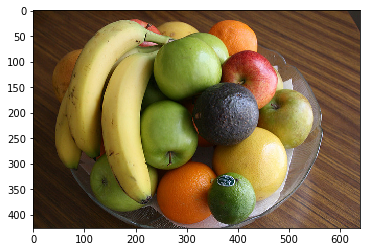

In [3]:
import json
from ibm_watson import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    '2018-03-19',
    iam_apikey=read_apikey())

file = 'data/fruitbowl.jpg'
with open(file, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        classifier_ids=["food"]).get_result()
    print(json.dumps(classes, indent=2))

plt.imshow(plt.imread(file))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "official",
              "score": 0.62,
              "type_hierarchy": "/person/official"
            },
            {
              "class": "person",
              "score": 0.772
            }
          ]
        }
      ],
      "image": "woman.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


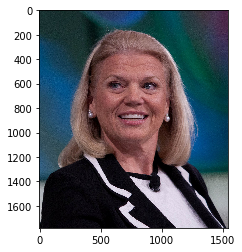

In [4]:
import json
from ibm_watson import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    '2018-03-19',
    iam_apikey=read_apikey())

file = 'data/woman.jpg'
with open(file, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.6',
        ).get_result()
    print(json.dumps(classes, indent=2))

plt.imshow(plt.imread(file))

{
  "images": [
    {
      "faces": [
        {
          "age": {
            "min": 50,
            "max": 53,
            "score": 0.8261783
          },
          "face_location": {
            "height": 744,
            "width": 606,
            "left": 460,
            "top": 373
          },
          "gender": {
            "gender": "FEMALE",
            "gender_label": "female",
            "score": 0.9999988
          }
        }
      ],
      "image": "woman.jpg"
    }
  ],
  "images_processed": 1
}


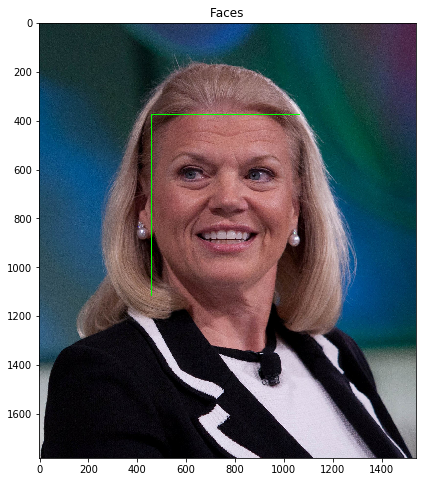

In [9]:
import cv2

file='data/woman.jpg'
with open(file, 'rb') as images_file:
    faces = visual_recognition.detect_faces(images_file).get_result()
print(json.dumps(faces, indent=2))

face_location = faces["images"][0]["faces"][0]["face_location"]
left = face_location['left']
width = face_location['width']
height = face_location['height']
top = face_location['top']
img = plt.imread(file)
cv2.rectangle(img, (left, top), (left+width, top+height), (0, 255,0), 2)
plt.figure(figsize=(12,8))
plt.title('Faces')
plt.imshow(img)